In [1]:
import cv2 as cv
import glob, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_cv(win_name, img):
    cv.imshow(win_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [3]:
glob.glob('test_images/*.jpg')

['test_images/scene1410.jpg', 'test_images/scene1380.jpg']

In [3]:
test_images = [cv.imread(path) for path in glob.glob('test_images/*.jpg')]

In [4]:
for img in test_images:
    print(img.shape)
    show_cv('test', img)

(720, 1280, 3)
(720, 1280, 3)


In [15]:
def show_plt(images, cmap=None):
    cols = 2
    rows = (len(images) + 1) // cols
    plt.figure(figsize=(15, 12))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i+1)
        cmap = 'gray' if len(img.shape) == 2 else cmap
        plt.imshow(img, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.show()

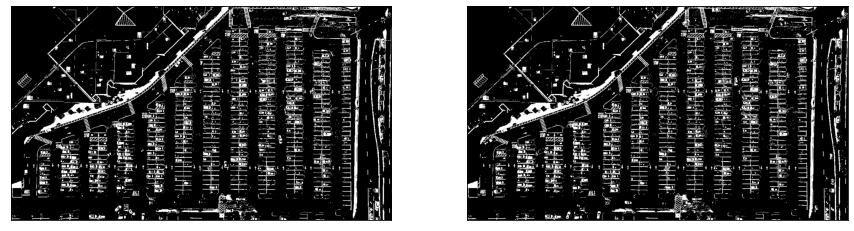

In [16]:
def select_rgb_white_yellow(img):
    lower = np.uint8([120,120,120])
    upper = np.uint8([255,255,255])
    white_mask = cv.inRange(img, lower, upper)
    return white_mask
white = list(map(select_rgb_white_yellow, test_images))
show_plt(white)

In [28]:
def select_rgb_white_yellow(img):
#     hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    
    lower = np.uint8([120,120,120])
    upper = np.uint8([255,255,255])
    white_mask = cv.inRange(img, lower, upper)
    show_cv('mask', white_mask)
    masked = cv.bitwise_and(img, img, mask=white_mask)
    show_cv('masked', masked)
    gray = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)
    show_cv('gray', gray)

In [29]:
select_rgb_white_yellow(test_images[0])

In [13]:
gray = cv.cvtColor(test_images[0], cv.COLOR_BGR2GRAY)
show_cv('gray', gray)